In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Problem 1

In [3]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [9]:
train.shape, test.shape

((7291, 257), (2007, 257))

In [10]:
usps=np.concatenate((train,test), axis=0)

In [11]:
usps.shape

(9298, 257)

In [16]:
usps_y=usps[:,0]
usps_x=usps[:,1:]

In [4]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [6]:
y_train

array([6., 5., 4., ..., 3., 0., 1.])

In [24]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)


In [69]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error=sum(x_test_pred!=y_test)/len(y_test)


In [70]:
error_95_lda=np.repeat(error,10,axis=0)

In [71]:
error_95_lda

array([0.11858495, 0.11858495, 0.11858495, 0.11858495, 0.11858495,
       0.11858495, 0.11858495, 0.11858495, 0.11858495, 0.11858495])

In [37]:
test_error_KNN_95=[]
compute_time_KNN_95=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_transformed_95, y_train)
    y_pred = knn.predict(x_test_transformed_95)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_KNN_95.append(test_scores)
    end=time.time()
    compute_time_KNN_95.append(end-start)
print(test_error_KNN_95)
print(compute_time_KNN_95)

[0.05331340308918786, 0.05580468360737423, 0.05430991529646234, 0.05530642750373693, 0.05231689088191327, 0.05580468360737423, 0.05580468360737423, 0.058295964125560484, 0.06028898854010967, 0.06377678126557051]
[1.1511409282684326, 1.1975860595703125, 1.3085992336273193, 1.3514392375946045, 1.2844688892364502, 1.3975749015808105, 1.4846301078796387, 1.5473008155822754, 1.5870471000671387, 1.4942431449890137]


In [19]:
import math
import operator
import numpy.linalg as LA
import time

In [20]:
def euclideanDistance(instance1, instance2):
 
    return LA.norm(instance1 - instance2)

In [21]:
def getCentroid(arr):
    length = arr.shape[0] # num of points
    return arr.sum(0) / length

In [22]:
def fit(x_train, y_train):
    classes = set(y_train)
    numClass = len(classes)
    class_train = {}
    for i in range(len(x_train)):
        key = y_train[i]
        value = x_train[i]
        if key not in class_train.keys():
            class_train[key] = []
        class_train[key].append(value)
    return class_train

In [23]:
def predict(class_train, x_test, k):
    predictions = []
    keys = class_train.keys()
    
    for x in x_test:
        class_dist = [] # to store [ key, centroid_dist]
        for key in keys:
            value = np.array(class_train[key])
            distances = LA.norm(x - value, axis = 1)           
            idx = np.argsort(distances)
            # use k nearest neighbors to find centroid point and calculate centroid dist through eculideanDistance
            kNearestNeighbors = value[idx[0:k]]
            
            centroid = getCentroid( kNearestNeighbors )
            centroid_dist = LA.norm(centroid - x) 
            
            # add centroid_dist to class_dist (for sorting)
            class_dist.append ( [key, centroid_dist] )
        
        # sort centroid_dist of x
        #class_dist.sort(key=operator.itemgetter(1))
        class_dist = np.array(class_dist)
        rsp_idx = np.argsort(class_dist[:,1])
        # predict y result for x
        #predictions.append(class_dist[0][0])
        predictions.append(class_dist[rsp_idx[0]][0])
             
    return predictions

In [36]:
test_error_kCentroid_95 = []
compute_time_kcentroid_95=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_95, y_train)

    y_pred = predict(c_train, x_test_transformed_95[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_95.append(test_scores)
    end = time. time()
    compute_time_kcentroid_95.append(end-start)
    
print(test_error_kCentroid_95)
print(compute_time_kcentroid_95)

[0.05331340308918786, 0.0503238664673642, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.04882909815645242, 0.04783258594917783, 0.04783258594917783, 0.04783258594917783]
[9.559170007705688, 10.056375741958618, 10.210526943206787, 9.796590089797974, 10.111027002334595, 9.923945903778076, 9.935244083404541, 9.812780857086182, 10.164266109466553, 10.192359924316406]


In [282]:
pca99 = PCA(0.99)
pca99.fit(x_train)
x_train_transformed_99 = pca99.transform(x_train)
x_test_transformed_99=pca99.transform(x_test)

In [72]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_99,y_train)
#x_train_LDA=lda.transform(x_train_transformed_99)
x_test_LDA=lda.transform(x_test_transformed_99)
x_test_pred=lda.predict(x_test_transformed_99)
error=sum(x_test_pred!=y_test)/len(y_test)


In [283]:
x_train_transformed_99.shape

(7291, 169)

In [284]:
x_train.shape

(7291, 256)

In [73]:
error_99_lda=np.repeat(error,10,axis=0)

In [74]:
error_99_lda

array([0.11509716, 0.11509716, 0.11509716, 0.11509716, 0.11509716,
       0.11509716, 0.11509716, 0.11509716, 0.11509716, 0.11509716])

In [46]:
test_error_KNN_99=[]
compute_time_KNN_99=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_transformed_99, y_train)
    y_pred = knn.predict(x_test_transformed_99)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_KNN_99.append(test_scores)
    end=time.time()
    compute_time_KNN_99.append(end-start)
print(test_error_KNN_99)
print(compute_time_KNN_99)


[0.05580468360737423, 0.05680119581464871, 0.05331340308918786, 0.05480817140009964, 0.05580468360737423, 0.05979073243647237, 0.05630293971101141, 0.059292476332835076, 0.06278026905829592, 0.06576980568011959]
[2.2389588356018066, 2.3727810382843018, 2.48864483833313, 2.552361011505127, 3.3540420532226562, 3.136394739151001, 3.029146194458008, 2.8969852924346924, 3.294023036956787, 4.733198881149292]


In [47]:
test_error_kCentroid_99 = []
compute_time_kcentroid_99=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_99, y_train)

    y_pred = predict(c_train, x_test_transformed_99[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_99.append(test_scores)
    end = time. time()
    compute_time_kcentroid_99.append(end-start)
    
print(test_error_kCentroid_99)
print(compute_time_kcentroid_99)


[0.05580468360737423, 0.05430991529646234, 0.0498256103637269, 0.04683607374190335, 0.047334329845540646, 0.048330842052815126, 0.04783258594917783, 0.047334329845540646, 0.0498256103637269, 0.04882909815645242]
[24.08208394050598, 22.427207946777344, 21.76434302330017, 23.478022813796997, 23.048779010772705, 23.29453992843628, 22.101472854614258, 22.46629786491394, 22.268059968948364, 23.457993984222412]


In [48]:
neighbours=range(1,11)

In [50]:
import matplotlib.pylab as pl
colors = pl.cm.jet(np.linspace(0,1,6))

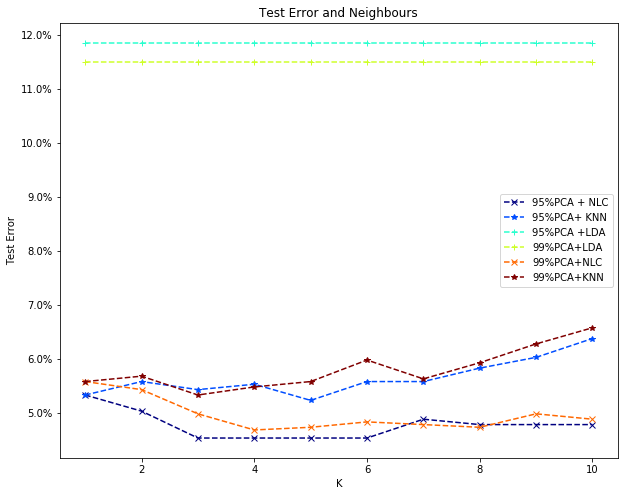

In [76]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (10,8))
ax = fig.add_subplot(1,1,1)


test_error_kCentroid95_g,=plt.plot(neighbours,test_error_kCentroid_95,color=colors[0],linestyle='dashed',marker='x',
        markerfacecolor=colors[0],markersize=6)
test_error_KNN95_g,=plt.plot(neighbours,test_error_KNN_95,color=colors[1],linestyle='dashed',marker='*',
        markerfacecolor=colors[1],markersize=6)
test_error_LDA95_g,=plt.plot(neighbours,error_95_lda,color=colors[2],linestyle='dashed',marker='+',
        markerfacecolor=colors[2],markersize=6)
test_error_LDA99_g,=plt.plot(neighbours,error_99_lda,color=colors[3],linestyle='dashed',marker='+',
        markerfacecolor=colors[3],markersize=6)
test_error_pca_kCentroid99_g,=plt.plot(neighbours,test_error_kCentroid_99,color=colors[4],linestyle='dashed',marker='x',
        markerfacecolor=colors[4],markersize=6)
test_error_pca_KNN99_g,=plt.plot(neighbours,test_error_KNN_99,color=colors[5],linestyle='dashed',marker='*',
        markerfacecolor=colors[5],markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error_kCentroid95_g,test_error_KNN95_g,test_error_LDA95_g,test_error_LDA99_g,test_error_pca_kCentroid99_g,test_error_pca_KNN99_g],
           ["95%PCA + NLC","95%PCA+ KNN", "95%PCA +LDA","99%PCA+LDA","99%PCA+NLC","99%PCA+KNN"])

# Problem 2

In [61]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_95,y_train).predict(x_test_transformed_95)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error=sum(x_test_pred!=y_test)/len(y_test)

In [62]:
error_95_qda=np.repeat(error,10,axis=0)

In [63]:
error_95_qda

array([0.07573493, 0.07573493, 0.07573493, 0.07573493, 0.07573493,
       0.07573493, 0.07573493, 0.07573493, 0.07573493, 0.07573493])

In [77]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_99,y_train).predict(x_test_transformed_99)
error=sum(x_test_pred!=y_test)/len(y_test)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [78]:
error_99_qda=np.repeat(error,10,axis=0)

In [79]:
error_99_qda

array([0.09367215, 0.09367215, 0.09367215, 0.09367215, 0.09367215,
       0.09367215, 0.09367215, 0.09367215, 0.09367215, 0.09367215])

In [92]:
lda_qda= {'LDA': [error_95_lda[0],error_99_lda[0]],
           'QDA':[error_95_qda[0],error_99_qda[0]]}
                    

In [106]:
lda_qda

{'LDA': [0.11858495266567015, 0.11509715994020926],
 'QDA': [0.07573492775286497, 0.09367214748380667]}

In [102]:
df=pd.DataFrame(lda_qda, columns=['LDA','QDA'],index=['PCA with 95% Variance','PCA with 99% Variance'])

In [103]:
df['QDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['QDA']], index = df.index)


In [104]:
df['LDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['LDA']], index = df.index)

In [105]:
df

,LDA,QDA
PCA with 95% Variance,11.86%,7.57%
PCA with 99% Variance,11.51%,9.37%


# Problem3

In [108]:
from sklearn.naive_bayes import GaussianNB


In [113]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
x_test_pred=gnb.predict(x_test)
gnb_error_full=sum(x_test_pred!=y_test)/len(y_test)

In [114]:
gnb_error_full

0.28051818634778275

In [118]:
gnb=GaussianNB()
gnb.fit(x_train_transformed_95,y_train)
x_test_pred=gnb.predict(x_test_transformed_95)
gnb_error_95=sum(x_test_pred!=y_test)/len(y_test)

In [119]:
gnb_error_95

0.1469855505729945

In [120]:
gnb=GaussianNB()
gnb.fit(x_train_transformed_99,y_train)
x_test_pred=gnb.predict(x_test_transformed_99)
gnb_error_99=sum(x_test_pred!=y_test)/len(y_test)

In [122]:
gnb_error_99

0.1798704534130543

In [ ]:
GNB=pd.Series([gnb_error_95,gnb_error_99])

In [123]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test)
x_test_pred=lda.predict(x_test)
error_lda_full=sum(x_test_pred!=y_test)/len(y_test)

In [124]:
error_lda_full

0.114598903836572

In [125]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train,y_train).predict(x_test)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_qda_full=sum(x_test_pred!=y_test)/len(y_test)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [126]:
error_qda_full

0.1833582461385152

In [127]:
df

,LDA,QDA
PCA with 95% Variance,11.86%,7.57%
PCA with 99% Variance,11.51%,9.37%


In [135]:
lda_qda_nbg= {'LDA': [error_95_lda[0],error_99_lda[0],error_lda_full],
           'QDA':[error_95_qda[0],error_99_qda[0],error_qda_full],
            'GNB':[gnb_error_95,gnb_error_99,gnb_error_full]}

In [136]:
df=pd.DataFrame(lda_qda_nbg, columns=['LDA','QDA','GNB'],index=['PCA with 95% Variance','PCA with 99% Variance', 'No projection'])

In [137]:
df['QDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['QDA']], index = df.index)


In [138]:
df['LDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['LDA']], index = df.index)

In [139]:
df['GNB'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['GNB']], index = df.index)

In [140]:
df

,LDA,QDA,GNB
PCA with 95% Variance,11.86%,7.57%,14.70%
PCA with 99% Variance,11.51%,9.37%,17.99%
No projection,11.46%,18.34%,28.05%


# Problem 4

In [285]:
from mlxtend.data import loadlocal_mnist

In [286]:
x_train,y_train=loadlocal_mnist(images_path='train-images.idx3-ubyte',
                                labels_path='train-labels.idx1-ubyte')

In [287]:
x_test,y_test=loadlocal_mnist(images_path='t10k-images.idx3-ubyte',
                                labels_path='t10k-labels.idx1-ubyte')

In [288]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [289]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [290]:
x_train01=x_train[np.where((y_train==0)|(y_train==1))]
x_train012=x_train[np.where((y_train==0)|(y_train==1)|(y_train==2))]
x_train49=x_train[np.where((y_train==4)|(y_train==9))]
x_train358=x_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]

x_test01=x_test[np.where((y_test==0)|(y_test==1))]
x_test012=x_test[np.where((y_test==0)|(y_test==1)|(y_test==2))]
x_test49=x_test[np.where((y_test==4)|(y_test==9))]
x_test358=x_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]



y_train01=y_train[np.where((y_train==0)|(y_train==1))]
y_train012=y_train[np.where((y_train==0)|(y_train==1)|(y_train==2))]
y_train49=y_train[np.where((y_train==4)|(y_train==9))]
y_train358=y_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]


y_test01=y_test[np.where((y_test==0)|(y_test==1))]
y_test012=y_test[np.where((y_test==0)|(y_test==1)|(y_test==2))]
y_test49=y_test[np.where((y_test==4)|(y_test==9))]
y_test358=y_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]



## 0 and 1

In [291]:
pca95 = PCA(0.95)
pca95.fit(x_train01)
x_train_transformed_95 = pca95.transform(x_train01)
x_test_transformed_95=pca95.transform(x_test01)

In [292]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train01)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_01_lda=sum(x_test_pred!=y_test01)/len(y_test01)

In [293]:
error_01_lda

0.0028368794326241137

In [294]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_95,y_train01).predict(x_test_transformed_95)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_01_qda=sum(x_test_pred!=y_test01)/len(y_test01)

In [203]:
error_01_qda

0.00851063829787234

## 4 and 9

In [208]:
pca95 = PCA(0.95)
pca95.fit(x_train49)
x_train_transformed_95 = pca95.transform(x_train49)
x_test_transformed_95=pca95.transform(x_test49)

In [209]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train49)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_49_lda=sum(x_test_pred!=y_test49)/len(y_test49)

In [210]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_95,y_train49).predict(x_test_transformed_95)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_49_qda=sum(x_test_pred!=y_test49)/len(y_test49)

In [211]:
error_49_lda

0.04419889502762431

In [212]:
error_49_qda

0.02059266700150678

## 0, 1 and 2

In [214]:
pca95 = PCA(0.95)
pca95.fit(x_train012)
x_train_transformed_95 = pca95.transform(x_train012)
x_test_transformed_95=pca95.transform(x_test012)

In [215]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train012)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_012_lda=sum(x_test_pred!=y_test012)/len(y_test012)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [217]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_95,y_train012).predict(x_test_transformed_95)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_012_qda=sum(x_test_pred!=y_test012)/len(y_test012)

In [218]:
error_012_lda

0.0292341912932952

In [219]:
error_012_qda

0.01334604385128694

## 3, 5 and 8

In [302]:
pca95 = PCA(0.95)
pca95.fit(x_train358)
x_train_transformed_95 = pca95.transform(x_train358)
x_test_transformed_95=pca95.transform(x_test358)

In [303]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train358)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_358_lda=sum(x_test_pred!=y_test358)/len(y_test358)

In [304]:
qda=QuadraticDiscriminantAnalysis()
x_test_pred=qda.fit(x_train_transformed_95,y_train358).predict(x_test_transformed_95)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_358_qda=sum(x_test_pred!=y_test358)/len(y_test358)

In [305]:
error_358_lda

0.07475660639777469

In [306]:
error_358_qda

0.03859527121001391

In [307]:
mnist_lda_qda={'LDA':[error_01_lda,error_49_lda,error_012_lda,error_358_lda],
                'QDA':[error_01_qda,error_49_qda,error_012_qda,error_358_qda]}

In [308]:
mnist_lda_qda

{'LDA': [0.0028368794326241137,
  0.04419889502762431,
  0.0292341912932952,
  0.07475660639777469],
 'QDA': [0.00851063829787234,
  0.02059266700150678,
  0.01334604385128694,
  0.03859527121001391]}

In [309]:
mnist_df=pd.DataFrame(mnist_lda_qda, columns=['LDA','QDA'], index=['0 and 1','4 and 9','0, 1 and 2','3, 5 and 8'])

In [310]:
mnist_df

,LDA,QDA
0 and 1,0.002837,0.008511
4 and 9,0.044199,0.020593
"0, 1 and 2",0.029234,0.013346
"3, 5 and 8",0.074757,0.038595


In [311]:
mnist_df['LDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in mnist_df['LDA']], index = mnist_df.index)

In [312]:
mnist_df['QDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in mnist_df['QDA']], index = mnist_df.index)

In [313]:
mnist_df

,LDA,QDA
0 and 1,0.28%,0.85%
4 and 9,4.42%,2.06%
"0, 1 and 2",2.92%,1.33%
"3, 5 and 8",7.48%,3.86%


In [257]:
y_train.shape

(60000,)

# Problem 5

In [321]:
import scipy.io as sio 

In [322]:
twogaussians_x_train=sio.loadmat('twogaussians.mat')['Xtr']
twogaussians_x_test=sio.loadmat('twogaussians.mat')['Xtst']
twogaussians_y_train=sio.loadmat('twogaussians.mat')['ytr']
twogaussians_y_test=sio.loadmat('twogaussians.mat')['ytst']

In [323]:
twogaussians_x_train.shape,twogaussians_y_train.shape

((200, 2), (1, 200))

In [340]:
twogaussians_y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=uint8)

In [339]:
twogaussians_y_train=np.reshape(twogaussians_y_train,newshape=(200,))
twogaussians_y_test=np.reshape(twogaussians_y_test,newshape=(100,))

In [325]:
#apply Lda and qda seperately 

In [380]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(twogaussians_x_train,twogaussians_y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(twogaussians_x_test)
x_test_pred=lda.predict(twogaussians_x_test)
error_twogaussian_lda=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [360]:
error_twogaussian_lda

0.1

In [381]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
x_test_pred=qda.fit(twogaussians_x_train,twogaussians_y_train).predict(twogaussians_x_test)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_twogaussian_qda=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [382]:
error_twogaussian_qda

0.07

In [383]:
two_g_data={'LDA':[error_twogaussian_lda],'QDA':[error_twogaussian_qda]}

In [384]:
two_g_data

{'LDA': [0.1], 'QDA': [0.07]}

In [385]:
two_g_df=pd.DataFrame(two_g_data, columns=['LDA','QDA'], index=['Error Rate'])

In [386]:
two_g_df['LDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in two_g_df['LDA']], index = two_g_df.index)

In [387]:
two_g_df['QDA'] = pd.Series(["{0:.2f}%".format(val * 100) for val in two_g_df['QDA']], index = two_g_df.index)

In [388]:
two_g_df

,LDA,QDA
Error Rate,10.00%,7.00%


In [389]:
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib as mpl

In [390]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    # filled gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

In [391]:
xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

In [392]:
lda.store_covariance

True

In [399]:
xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))

In [410]:
twogaussians_x_train[twogaussians_y_train==1,0].shape

(100,)

In [420]:
twogaussians_x_train[twogaussians_y_train==2,0].shape

(100,)

In [423]:
twogaussians_x_test[:,0].shape

(100,)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)


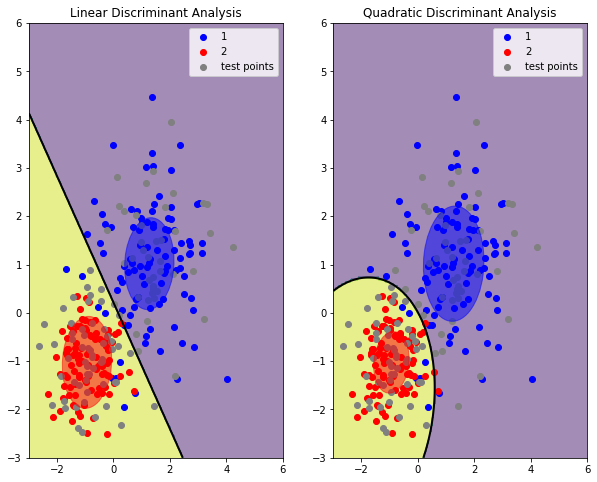

In [425]:
xx, yy = np.meshgrid(np.linspace(-3, 6, 200), np.linspace(-3, 6, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

pl.figure(1, (10,8))
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Linear Discriminant Analysis')

splot = pl.subplot(1, 2, 2)
pl.contourf(xx, yy, zz_qda > 0.5, alpha=0.5)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='black')
plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'r')
pl.legend()
pl.axis('tight')
pl.title('Quadratic Discriminant Analysis')
pl.show()